In [10]:
# !pip install yfinance
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Download stock price data
data = yf.download('JPM', start='2020-01-01', end='2023-11-30')

[*********************100%%**********************]  1 of 1 completed


In [11]:
# Compute log returns
data['Log Returns'] = np.log(data['Close']).diff()

# Remove missing values
data = data.dropna()

In [12]:
# Define the state transition matrix
F = np.array([[1]])

# Define the observation matrix
H = np.array([[1]])

# Define the process noise covariance
Q = np.array([[0.001]])

# Define the observation noise covariance
R = np.array([[0.01]])

# Define the initial state
x0 = np.array([0])

# Define the number of time steps
T = len(data)

# Generate the observations
y = data['Log Returns'].values.reshape(-1, 1)

In [13]:
# Initialize the state estimate and covariance
x_hat = np.zeros((T, 1))
P = np.zeros((T, 1, 1))

x_hat[0] = x0
P[0] = Q

# Run the Kalman filter
for t in range(1, T):
    # Prediction step
    x_hat[t] = F @ x_hat[t-1]
    P[t] = F @ P[t-1] @ F.T + Q

    # Update step
    K = P[t] @ H.T @ np.linalg.inv(H @ P[t] @ H.T + R)
    x_hat[t] = x_hat[t] + K @ (y[t] - H @ x_hat[t])
    P[t] = (np.eye(1) - K @ H) @ P[t]

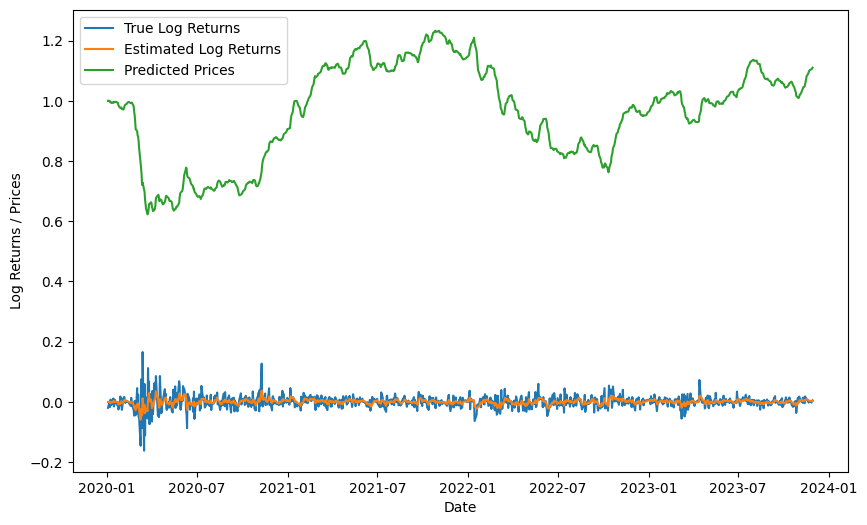

In [14]:
# Compute the estimated log returns
log_returns_hat = x_hat.flatten()

# Compute the predicted stock prices
prices_hat = np.exp(np.cumsum(log_returns_hat))

# Plot the true log returns, estimated log returns and predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Log Returns'], label='True Log Returns')
plt.plot(data.index, log_returns_hat, label='Estimated Log Returns')
plt.plot(data.index, prices_hat, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Log Returns / Prices')
plt.legend()
plt.show()